<a href="https://colab.research.google.com/github/Tehilag37/Netflix_Data_Science/blob/main/1_Data_Preparation_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data preparation
 

We can define data preparation as the transformation of raw data into a form that is more suitable for modeling.

Nevertheless, there are steps in a predictive modeling project before and after the data preparation step that are important and inform the data preparation that is to be performed.

The process of applied machine learning consists of a sequence of steps.

We may jump back and forth between the steps for any given project, but all projects have the same general steps; they are:

1. Define Problem.
2. Prepare Data.
3. Evaluate Models.
4. Finalize Model.

We are concerned with the data preparation step (step 2), and there are common or standard tasks that you may use or explore during the data preparation step in a machine learning project.

The types of data preparation performed depend on your data, as you might expect.

Nevertheless, as you work through multiple predictive modeling projects, you see and require the same types of data preparation tasks again and again.

These tasks include:

* Data Cleaning: Identifying and correcting mistakes or errors in the data.
* Feature Selection: Identifying those input variables that are most relevant to the task.
* Data Transforms: Changing the scale or distribution of variables.
Feature Engineering: Deriving new variables from available data.
* Dimensionality Reduction: Creating compact projections of the data.
This provides a rough framework that we can use to think about and navigate different data preparation algorithms we may consider on a given project with structured or tabular data.

Today we'll take a closer look at some key points of the tasks.


#Know Your Data 
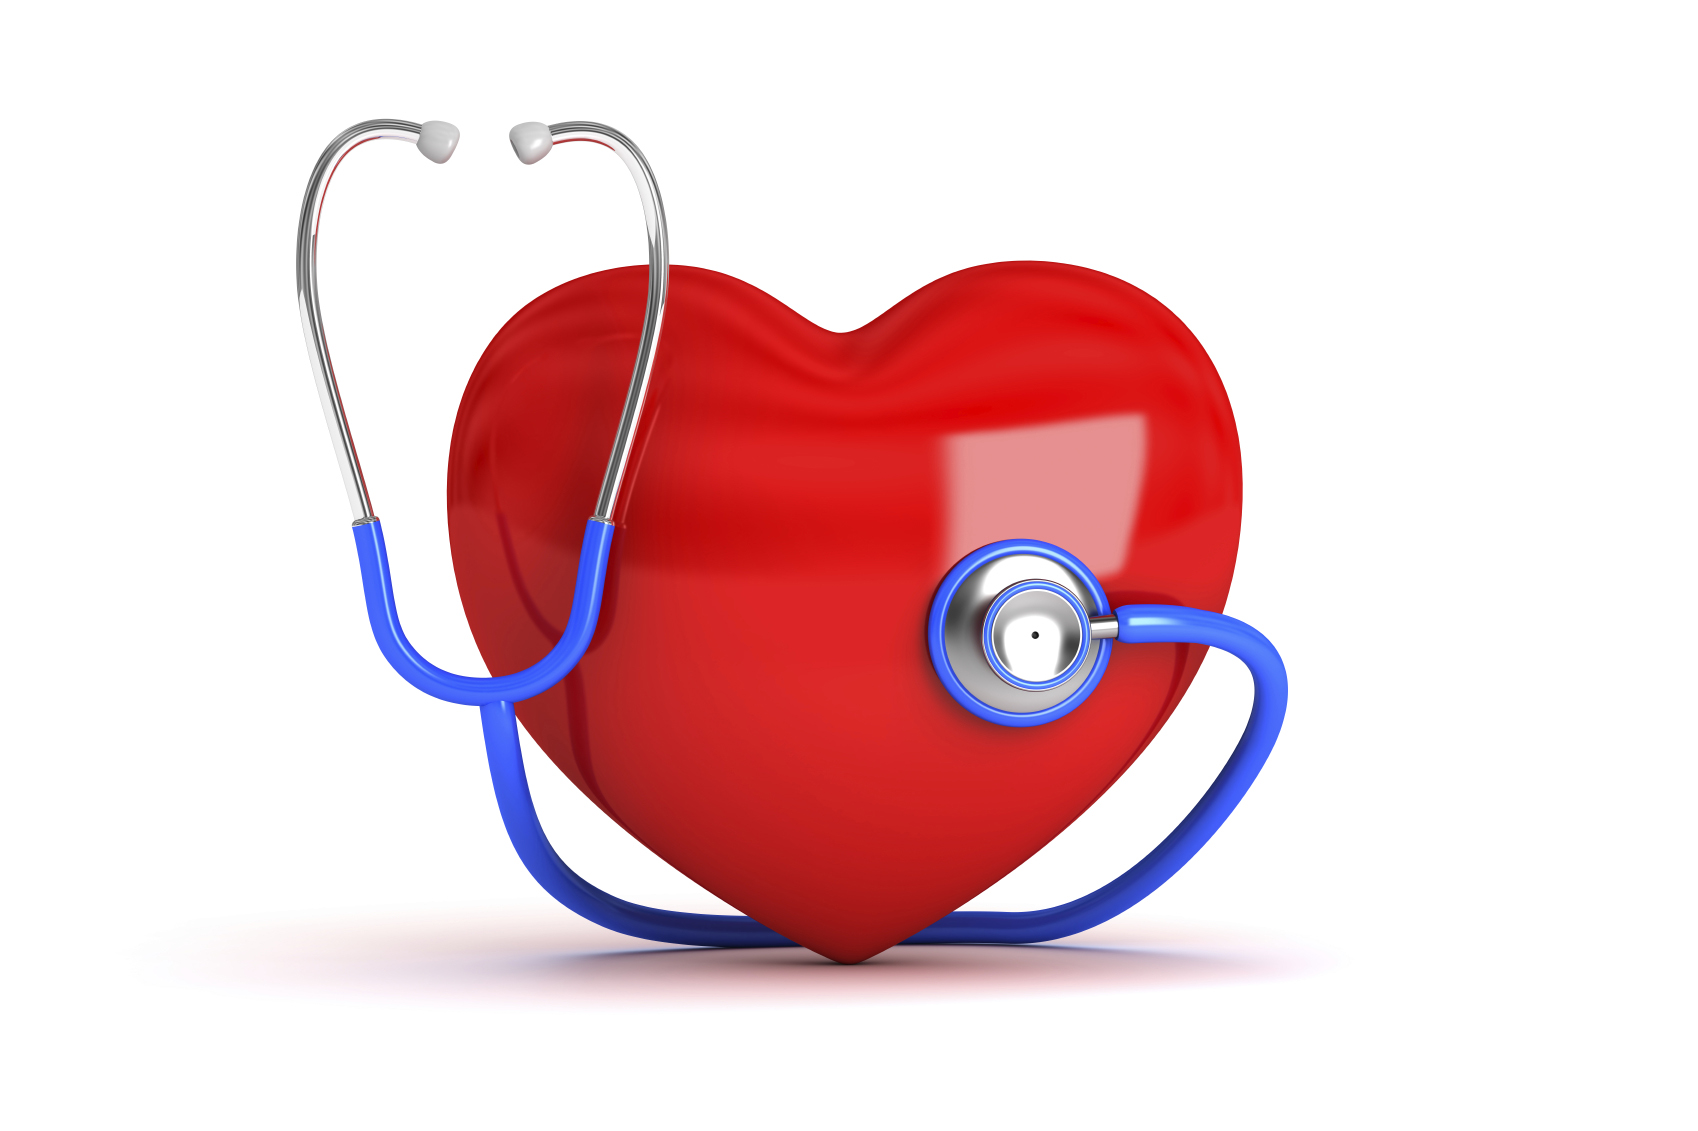

Load the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [ ]:
#load the heart disease file from github
heart_df = pd.read_csv('https://raw.githubusercontent.com/ShaiShmuel/BigData/master/DataSets/heart.csv')
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      319 non-null    object 
 1   age       319 non-null    int64  
 2   sex       317 non-null    object 
 3   cp        319 non-null    int64  
 4   trestbps  319 non-null    int64  
 5   chol      318 non-null    float64
 6   fbs       319 non-null    int64  
 7   a1c       319 non-null    int64  
 8   restecg   319 non-null    int64  
 9   thalach   318 non-null    float64
 10  exang     319 non-null    int64  
 11  oldpeak   319 non-null    float64
 12  slope     319 non-null    int64  
 13  ca        319 non-null    int64  
 14  thal      319 non-null    int64  
 15  livfun    319 non-null    int64  
 16  tilt      24 non-null     float64
 17  target    319 non-null    object 
dtypes: float64(4), int64(11), object(3)
memory usage: 45.0+ KB


In [ ]:
heart_df.head()

,name,age,sex,cp,trestbps,chol,fbs,a1c,restecg,thalach,exang,oldpeak,slope,ca,thal,livfun,tilt,target
0,Noah,63,male,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,0.0,yes
1,Oliver,37,male,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,1.0,yes
2,William,41,female,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,NaN,yes
3,Elijah,56,male,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,NaN,yes
4,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,NaN,yes


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- **name**: The person's first name
- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **a1c:** The result of person's a1c test (1 = passed; 0 = failed) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **liv_fun:** The result of a liver function test(1 = normal , 0 = abnormal)
- **tilt:** Whether different body positions will trigger an abnormal heart beat
- **target:** Heart disease (0 = no, 1 = yes)



Lets' change the column names for readability  

In [ ]:
heart_df.columns = ['first_name', 'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'a1c_test', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'liver_function', 'tilt_test','target']

In [ ]:
#heart_df = heart_df.rename({'gil': 'age'}, axis=1)
#heart_df.rename({'sex': 'gender'}, axis='columns', inplace=True)

heart_df.head()

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
0,Noah,63,male,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,0.0,yes
1,Oliver,37,male,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,1.0,yes
2,William,41,female,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,NaN,yes
3,Elijah,56,male,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,NaN,yes
4,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,NaN,yes


In [ ]:
heart_df.head()

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
0,Noah,63,male,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,0.0,yes
1,Oliver,37,male,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,1.0,yes
2,William,41,female,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,NaN,yes
3,Elijah,56,male,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,NaN,yes
4,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,NaN,yes


In [ ]:
heart_df.describe()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test
count,319.000000,319.000000,319.000000,318.000000,319.000000,319.000000,319.000000,318.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.0,24.000000
mean,54.470219,0.987461,131.300940,247.361635,0.150470,0.849530,0.523511,150.000000,0.329154,1.033542,1.391850,0.711599,2.316614,1.0,0.541667
std,9.005496,1.036973,17.748515,55.211421,0.358093,0.358093,0.524775,22.597004,0.470644,1.157273,0.624497,1.008559,0.606625,0.0,0.508977
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,1.000000,0.000000,136.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,0.000000
50%,56.000000,1.000000,130.000000,240.000000,0.000000,1.000000,1.000000,154.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.0,1.000000
75%,61.000000,2.000000,140.000000,275.750000,0.000000,1.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.0,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.0,1.000000


<h1>The Data preprocessing Process</h1>

#Data Correctness
Always doubt the reliability of your data first.
It is possible that some errors were made when the data got collected.

##Check for duplicate cases
Assuming that all cases in the data set are distinct we are not suppose to have identical or repeating rows. If we locate them we should consider removing them from the DF because they might result in biased model.

In [ ]:
#are there any duplicates? counts true values
heart_df.duplicated().sum()

13

In [ ]:
#lets see them
heart_df[heart_df.duplicated()]

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
303,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,NaN,yes
304,Daniel,64,male,3,110,211.0,0,1,0,144.0,1,1.8,1,0,2,1,NaN,yes
305,Samuel,59,male,0,135,234.0,0,1,1,161.0,0,0.5,1,0,3,1,NaN,yes
306,Julian,53,male,2,130,197.0,1,0,0,152.0,0,1.2,0,0,2,1,NaN,yes
307,Gabriel,46,female,2,142,177.0,0,1,0,160.0,1,1.4,0,0,2,1,NaN,yes
308,Thomas,52,male,1,120,325.0,0,1,1,172.0,0,0.2,2,0,2,1,NaN,yes
309,Isaiah,66,male,0,120,302.0,0,1,0,151.0,0,0.4,1,0,2,1,NaN,yes
312,Ian,58,male,2,105,240.0,0,1,0,154.0,1,0.6,1,0,3,1,NaN,yes
313,Luca,67,female,2,115,564.0,0,1,0,160.0,0,1.6,1,0,3,1,NaN,yes
314,Declan,54,female,1,132,288.0,1,0,0,159.0,1,0.0,2,1,2,1,NaN,yes


In [ ]:
#drop the cases only  if you are sure that this data is wrong!!!
heart_df.drop_duplicates(inplace=True)

#heart_df.reset_index(inplace=True)
heart_df.reset_index(inplace=True, drop=True)
heart_df

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
0,Noah,63,male,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,0.0,yes
1,Oliver,37,male,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,1.0,yes
2,William,41,female,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,NaN,yes
3,Elijah,56,male,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,NaN,yes
4,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Hendrix,57,male,0,130,131.0,0,1,1,115.0,1,1.2,1,1,3,1,NaN,no
302,Liam,57,female,1,130,236.0,0,1,0,174.0,0,0.0,1,1,2,1,NaN,no
303,Aaron,57,female,0,128,303.0,0,1,0,159.0,0,0.0,2,1,2,1,0.0,yes
304,Roman,51,male,2,94,227.0,0,1,1,154.0,1,0.0,2,1,3,1,NaN,yes


#Check for missing values
Missing data might affect the data analysis. What to do when there is missing data?
* There are several useful methods for detecting, removing, and replacing null values in Pandas data structures. 

* **isnull() or isna()** - return DF where True is written if the value is Nan

In [ ]:
#How many missing data values are there?
#heart_df.isnull() #this will return true or false table

missing = heart_df.isnull()
missing.sum()

missing.sum() * 100 / len(heart_df) # option to display the percentage of the missing values

first_name                  0.000000
age                         0.000000
sex                         0.653595
chest_pain_type             0.000000
resting_blood_pressure      0.000000
cholesterol                 0.326797
fasting_blood_sugar         0.000000
a1c_test                    0.000000
rest_ecg                    0.000000
max_heart_rate_achieved     0.326797
exercise_induced_angina     0.000000
st_depression               0.000000
st_slope                    0.000000
num_major_vessels           0.000000
thalassemia                 0.000000
liver_function              0.000000
tilt_test                  92.156863
target                      0.000000
dtype: float64

In [ ]:
missing

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
303,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
#display rows with any null value of each col(axis=1)
heart_df[missing.any(axis=1)]

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
2,William,41,female,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,NaN,yes
3,Elijah,56,male,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,NaN,yes
4,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,NaN,yes
6,Lucas,56,female,1,140,294.0,0,1,0,153.0,0,1.3,1,0,2,1,NaN,yes
7,Mason,44,male,1,120,263.0,0,1,1,173.0,0,0.0,2,0,3,1,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Khalil,68,male,0,144,193.0,1,0,1,141.0,0,3.4,1,2,3,1,NaN,no
301,Hendrix,57,male,0,130,131.0,0,1,1,115.0,1,1.2,1,1,3,1,NaN,no
302,Liam,57,female,1,130,236.0,0,1,0,174.0,0,0.0,1,1,2,1,NaN,no
304,Roman,51,male,2,94,227.0,0,1,1,154.0,1,0.0,2,1,3,1,NaN,yes


## Replace Nans with values
If it makes sense, it is possible to insert a value instead of a Nan by using the fillna function.

for example, if we wanted to state the if a tilt test is missing:

In [ ]:
heart_cp = heart_df.copy()
heart_cp['tilt_test'].fillna(value='TBD', inplace=True) # To Be Done
heart_cp['sex'].fillna(value='male', inplace=True) # or female
heart_cp['cholesterol'].fillna(value=heart_cp['cholesterol'].mean(), inplace=True)
heart_cp['max_heart_rate_achieved'].fillna(value=heart_cp['max_heart_rate_achieved'].median(), inplace=True)
heart_cp[missing.any(axis=1)] # display the missing rows with the new values we assigned

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
2,William,41,female,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,TBD,yes
3,Elijah,56,male,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,TBD,yes
4,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,TBD,yes
6,Lucas,56,female,1,140,294.0,0,1,0,153.0,0,1.3,1,0,2,1,TBD,yes
7,Mason,44,male,1,120,263.0,0,1,1,173.0,0,0.0,2,0,3,1,TBD,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Khalil,68,male,0,144,193.0,1,0,1,141.0,0,3.4,1,2,3,1,TBD,no
301,Hendrix,57,male,0,130,131.0,0,1,1,115.0,1,1.2,1,1,3,1,TBD,no
302,Liam,57,female,1,130,236.0,0,1,0,174.0,0,0.0,1,1,2,1,TBD,no
304,Roman,51,male,2,94,227.0,0,1,1,154.0,1,0.0,2,1,3,1,TBD,yes


In [ ]:
heart_cp[missing['sex']]

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
71,Roman,51,male,2,94,227.0,0,1,1,154.0,1,0.0,2,1,3,1,TBD,yes
94,Evan,45,male,1,112,160.0,0,1,1,138.0,0,0.0,1,0,2,1,TBD,yes


The fillna method is more usefull when we have better understanding of the reasons for the missing values and their importance.



##Remove missing values
Sometimes it makes more sense to remove the entire row or column

In [ ]:
pd.crosstab(index=missing['tilt_test'], columns='Count', normalize=False, margins=True)

col_0,Count,All
tilt_test,,
False,24,24
True,282,282
All,306,306


In [ ]:
# heart_df.drop(axis=1, columns=['tilt_test'], inplace=True)

In [ ]:
heart_df.head()

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,tilt_test,target
0,Noah,63,male,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,0.0,yes
1,Oliver,37,male,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,1.0,yes
2,William,41,female,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,NaN,yes
3,Elijah,56,male,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,NaN,yes
4,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,NaN,yes


You can also consider removing Nans rows or columns by using the dropna method

In [ ]:
# count num of rows
print(heart_df.shape[0])

# count num of columns
print(heart_df.shape[1])


306
18


In [ ]:
#drop a column that does not have at least 80% non-Nan values 
heart_df.dropna(axis=1, thresh=0.8 * heart_df.shape[0], inplace=True)
heart_df.head()

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,target
0,Noah,63,male,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,yes
1,Oliver,37,male,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,yes
2,William,41,female,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,yes
3,Elijah,56,male,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,yes
4,James,57,female,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,yes


In [ ]:
# remove rows with a Nan
heart_cp = heart_df.copy()
heart_df.dropna(inplace=True) # axis=0 is default

# lets check changes
heart_cp.describe() - heart_df.describe()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function
count,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,0.002686,0.006957,-0.232511,-0.349651,-0.001456,0.001456,0.004659,-0.023741,0.000065,-0.006957,0.002621,-0.000679,0.003494,0.0
std,0.007091,-0.001652,0.099622,0.080460,-0.001453,-0.001453,-0.000496,-0.064570,0.000016,-0.002670,-0.000693,-0.003956,-0.000206,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-0.500000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## Convert a string cathegorical (binary or ordinal) value to numeric value where possible
(We'll come back to this task again when we'll start working with classification models).



In [ ]:
print(heart_df.sex.unique())
print(heart_df.target.unique())

['male' 'female']
['yes' 'no']


In [ ]:
heart_df.sex.replace({'male':1, 'female':0}, inplace=True)
heart_df.target.replace({'yes':1, 'no':0}, inplace=True)
heart_df.head()

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,target
0,Noah,63,1,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,1
1,Oliver,37,1,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,1
2,William,41,0,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,1
3,Elijah,56,1,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,1
4,James,57,0,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,1


##Re-Confirm Data types after modifications

In [ ]:
heart_df.dtypes

first_name                  object
age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                float64
fasting_blood_sugar          int64
a1c_test                     int64
rest_ecg                     int64
max_heart_rate_achieved    float64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
liver_function               int64
target                       int64
dtype: object

#Excercise - Weather Prediction
1. Run the next cell to import the ***weather_data.csv*** file from github 

>**important note!!! :** notice the parameter *parse_dates=['day']* in the readcsv( ) function

2. What is the number of rows with missing values?
3. Print the rows with missing values
4. The model we are creating is predicting the 'event' variable. Do you think that there is an irrelevant feature in the DF? remove it.
5. Fill the windspeed missing values with the mean value
6. Convert the 'event' feature data from a string to a numerical cathegory.
7. Take a look at the temperture on the 2017-01-06. It's missing. What do you think it should be? 


In [ ]:
weather_df = pd.read_csv('https://raw.githubusercontent.com/ShaiShmuel/BigData/master/DataSets/weather_data.csv',parse_dates=['day'], index_col='day')
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2017-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7 non-null      float64
 1   windspeed    6 non-null      float64
 2   day_type     11 non-null     object 
 3   event        9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 440.0+ bytes


In [ ]:
weather_df

,temperature,windspeed,day_type,event
day,,,,
2017-01-01,32.0,6.0,Holyday,Rain
2017-01-04,NaN,9.0,Weekend,Sunny
2017-01-05,28.0,NaN,Regular,Snow
2017-01-06,NaN,7.0,Regular,NaN
2017-01-07,32.0,NaN,Regular,Rain
2017-01-08,NaN,NaN,Regular,Sunny
2017-01-09,NaN,NaN,Regular,NaN
2017-01-10,34.0,8.0,Weekend,Cloudy
2017-01-11,40.0,12.0,Weekend,Sunny


In [ ]:
#num of row with any Nan value

weather_df.isnull().any(axis=1).sum()

7

In [ ]:
weather_df.drop('day_type', axis = 1, inplace= True)
weather_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
weather_df.windspeed.fillna(value = weather_df['windspeed'].mean(), inplace = True)
weather_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,8.0,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,8.0,Rain
2017-01-08,NaN,8.0,Sunny
2017-01-09,NaN,8.0,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
weather_df.event.replace({'Snow':0, 'Rain':1, 'Cloudy':2, 'Sunny':3}, inplace= True)

In [ ]:
weather_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,1.0
2017-01-04,NaN,9.0,3.0
2017-01-05,28.0,8.0,0.0
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,8.0,1.0
2017-01-08,NaN,8.0,3.0
2017-01-09,NaN,8.0,NaN
2017-01-10,34.0,8.0,2.0
2017-01-11,40.0,12.0,3.0


In [ ]:
# weather_df['inter_temperature'] = weather_df['temperature'].interpolate(method='linear')
weather_df['temperature'] = weather_df['temperature'].interpolate(method='linear')
weather_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.0,1.0
2017-01-04,30.000000,9.0,3.0
2017-01-05,28.000000,8.0,0.0
2017-01-06,30.000000,7.0,NaN
2017-01-07,32.000000,8.0,1.0
2017-01-08,32.666667,8.0,3.0
2017-01-09,33.333333,8.0,NaN
2017-01-10,34.000000,8.0,2.0
2017-01-11,40.000000,12.0,3.0


---


#Naive Feature Selection
remove unnecessary feature - is there is a feature that doesn't contribute any relevant data to the model we'll simply remove it.
an example can be somebody's bank acount number when we are interested in his balance. 

**Can you tell if there's an unnecessary feature in this DF?**


In [ ]:
heart_df.head()

,first_name,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,target
0,Noah,63,1,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,1
1,Oliver,37,1,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,1
2,William,41,0,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,1
3,Elijah,56,1,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,1
4,James,57,0,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,1


In [ ]:
heart_df.drop('first_name', axis=1, inplace = True)

In [ ]:
heart_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,liver_function,target
0,63,1,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1,1
1,37,1,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1,1
2,41,0,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1,1
3,56,1,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1,1
4,57,0,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1,1


##Zero variance features
are feature with a constant value and therefore have no impact on the model predectability.

A near-zero variance feature should also have less or non influence on the model but further investigation should be conducted before drop.


In [ ]:
#check number of unique values in each column
heart_df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                151
fasting_blood_sugar          2
a1c_test                     2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
liver_function               1
target                       2
dtype: int64

In [ ]:
#removing the liver function column
heart_df.drop('liver_function', axis=1, inplace = True)

In [ ]:
heart_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233.0,1,0,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,1,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,1,163.0,1,0.6,2,0,2,1


##Correlated Features
Remove features that are redundant or explain the same information


In [ ]:
heart_df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,a1c_test,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.113453,-0.077861,0.280675,0.210914,0.120513,-0.120513,-0.115770,-0.404905,0.095105,0.209660,-0.177835,0.277678,0.058708,-0.223558
sex,-0.113453,1.000000,-0.042255,-0.058976,-0.217551,0.047862,-0.047862,-0.055217,-0.042539,0.146201,0.091817,-0.037533,0.106458,0.209735,-0.286632
chest_pain_type,-0.077861,-0.042255,1.000000,0.051373,-0.085388,0.098339,-0.098339,0.041559,0.297061,-0.387122,-0.148438,0.115403,-0.185931,-0.162347,0.424501
resting_blood_pressure,0.280675,-0.058976,0.051373,1.000000,0.117894,0.175855,-0.175855,-0.108315,-0.048370,0.064132,0.190514,-0.122204,0.098962,0.064031,-0.140527
cholesterol,0.210914,-0.217551,-0.085388,0.117894,1.000000,0.008803,-0.008803,-0.148315,-0.015725,0.059589,0.048813,-0.008350,0.071423,0.090389,-0.075477
fasting_blood_sugar,0.120513,0.047862,0.098339,0.175855,0.008803,1.000000,-1.000000,-0.081538,-0.008067,0.025665,0.004553,-0.059894,0.135051,-0.029814,-0.028046
a1c_test,-0.120513,-0.047862,-0.098339,-0.175855,-0.008803,-1.000000,1.000000,0.081538,0.008067,-0.025665,-0.004553,0.059894,-0.135051,0.029814,0.028046
rest_ecg,-0.115770,-0.055217,0.041559,-0.108315,-0.148315,-0.081538,0.081538,1.000000,0.040403,-0.066333,-0.050482,0.086880,-0.067720,-0.013663,0.131439
max_heart_rate_achieved,-0.404905,-0.042539,0.297061,-0.048370,-0.015725,-0.008067,0.008067,0.040403,1.000000,-0.377159,-0.349022,0.388536,-0.218169,-0.096116,0.419740
exercise_induced_angina,0.095105,0.146201,-0.387122,0.064132,0.059589,0.025665,-0.025665,-0.066333,-0.377159,1.000000,0.285917,-0.257748,0.111048,0.210866,-0.436757


In [ ]:
#draw heatmap
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=heart_df.corr(), 
    x= heart_df.columns,  
    y= heart_df.columns,
))
fig.update_layout({
    'title':"Heart Dataframe Correlation Heatmap"
})


fig.show()

we can see that the 'a1c_test' and 'fasting_blood_sugar' features have strong negative corelation.

let's take a closer look



In [ ]:
heart_df[['fasting_blood_sugar','a1c_test']]

,fasting_blood_sugar,a1c_test
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
301,0,1
302,0,1
303,0,1
304,0,1


We now see that the values are true oposites. We should definitely remove one of the features.

In [ ]:
heart_df.drop('a1c_test', axis=1, inplace=True)
heart_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1


#Binning
In some cases we might want to convert a countinous variable to a discrete one.

Let's say we would like to cathegorize the cholesterol to 3 levels:
1. 0-199
2. 200-399
3. 400-599

Binning is done usfully with the 'pd.cut' function.



In [ ]:
#first create the bins and the labels 
bins = [0,199,399,599]
labels = ['low', 'medium','high']
heart_df['cholesterol_level'] = pd.cut(x=heart_df.cholesterol, bins=bins, labels=labels)
heart_df.head(20)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,cholesterol_level
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1,medium
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1,medium
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1,medium
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1,medium
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1,medium
5,57,1,0,140,192.0,0,1,148.0,0,0.4,1,0,1,1,low
6,56,0,1,140,294.0,0,0,153.0,0,1.3,1,0,2,1,medium
7,44,1,1,120,263.0,0,1,173.0,0,0.0,2,0,3,1,medium
8,52,1,2,172,199.0,1,1,162.0,0,0.5,2,0,3,1,low
9,57,1,2,150,168.0,0,1,174.0,0,1.6,2,0,2,1,low


In [ ]:
#lets display the frequency table of the cholesterol levels
cross_df = pd.crosstab(index=heart_df.cholesterol_level, columns=['Count'])
cross_df

col_0,Count
cholesterol_level,
low,49
medium,250
high,4


In [ ]:
fig = go.Figure()
fig.add_traces(go.Pie(labels=['level 1', 'level 2', 'level 3'], values=cross_df.Count))
fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=10, hole=0.4,
                  marker=dict(line=dict(color='#000000', width=1)))
fig.show()

#Outliers Detection

Looking at a boxplot - the outliers  are shown as circles by default, they are case values that exceeds the end of the whiskers (1.5 * IQR from the edge of the box) 
There are few outlier detection algorithms, as you can find in [this article]('https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/').
</br>
A simple algorithm - The IQR method is where we locate the cases that are greater than $q3 + iqr * 1.5$ and smaller than $q1 - iqr * 1.5$

For example lets try and locate the outliers in the heart DF resting_blood_pressure feature 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='resting blood pressure', y=heart_df.resting_blood_pressure, boxmean='sd'))

# fig.update_traces(
#     marker=dict(
#         color='blue',
#         outliercolor='red',
#         line=dict(
#             outliercolor='orange',
#             outlierwidth=2)),
#     line_color='green'
# )
fig.show()

Get the outliers cases

In [ ]:
# IQR 
Q1 = np.percentile(heart_df['resting_blood_pressure'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(heart_df['resting_blood_pressure'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
  
# Upper bound
upper = np.where(heart_df['resting_blood_pressure'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(heart_df['resting_blood_pressure'] <= (Q1-1.5*IQR))
 
 
print("Upper rows index: ", upper[0])

print("Upper rows index: ", lower[0])

Upper rows index:  [  8  98 107 149 192 200 220 225 238 245 257 263 289]
Upper rows index:  []


###Should we always remove the outliers
When considering whether to remove an outlier, you’ll need to evaluate if it appropriately reflects your target population, subject-area, research question, and research methodology. Did anything unusual happen while measuring these observations, such as power failures, abnormal experimental conditions, or anything else out of the norm? Is there anything substantially different about an observation, whether it’s a person, item, or transaction? Did measurement or data entry errors occur?


If the outlier in question is:

* A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
* Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
* A natural part of the population you are studying, you should not remove it.

### Removing the outliers
In case you decided to try and remove the outliers - this is an optional way of doing it.

In [ ]:
print("New Shape: ", heart_df.shape)

heart_df.drop(upper[0], inplace = True)
heart_df.drop(lower[0], inplace = True)
 
print("New Shape: ", heart_df.shape)

New Shape:  (303, 15)
New Shape:  (290, 15)


In [ ]:
# heart_df.reset_index(inplace=True, drop=True)

heart_df


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,cholesterol_level
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1,medium
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1,medium
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1,medium
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1,medium
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,57,1,0,130,131.0,0,1,115.0,1,1.2,1,1,3,0,low
302,57,0,1,130,236.0,0,0,174.0,0,0.0,1,1,2,0,medium
303,57,0,0,128,303.0,0,0,159.0,0,0.0,2,1,2,1,medium
304,51,1,2,94,227.0,0,1,154.0,1,0.0,2,1,3,1,medium


#Feature Scaling




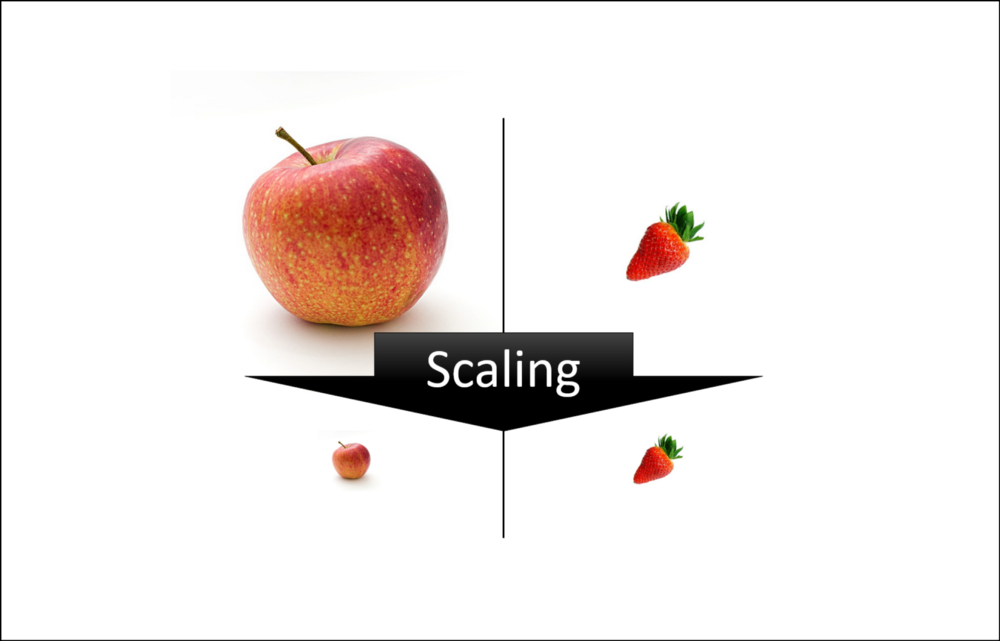

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

###Standardization

It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

$$x_{i(standard-normalization))} = \frac{x_i-\hat{x}}{std(x)}$$
where:
$$\hat{x}=\frac{1}{n}\sum_n{x_i}$$
$$std(x)=\sqrt{\frac{\sum_n{(x_i-\hat{x})^2}}{n}}$$



###Min-Max Normalization

This technique re-scales a feature or observation value with distribution value between 0 and 1.

$$ x_{i(min-max-normalization)} = \frac{x_i -{min(x)}}{{max(x)}-{min(x)}}$$




###Quantile Normalization

One of the main goals performing normalization like Quantile normalization is to transform the raw data such that we can remove any unwanted variation due to technical artifacts and preserve the actual variation that we are interested in studying. 

$$x_{i(quartile-normalization))} = \frac{x_i-median(x)}{IQR(x)}$$
where:
$$IQR(x) = Q_3 - Q_1$$

* IQR is the interquartile range, also called the midspread or middle 50%

### The SKLearn library
is a free software machine learning library for the Python programming language.

It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.




### Scaling data with SKLearn library


In [ ]:
#import scaling modules from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#standardization
standard_scaler = StandardScaler()
heart_df['max_heart_rate_achieved_std'] = standard_scaler.fit_transform(heart_df[['max_heart_rate_achieved']])
heart_df['max_heart_rate_achieved_std'].head()

0    0.016888
1    1.620475
2    0.970372
3    1.230413
4    0.580310
Name: max_heart_rate_achieved_std, dtype: float64

In [ ]:
heart_df['max_heart_rate_achieved_std'].mean()

2.2663863123382507e-16

In [ ]:
heart_df['max_heart_rate_achieved_std'].std()

1.0017286097603761

In [ ]:
#min max
min_max_scaler = MinMaxScaler()
heart_df['cholesterol_min_max'] = min_max_scaler.fit_transform(heart_df[['cholesterol']])
heart_df['cholesterol_min_max'].head()

0    0.244292
1    0.283105
2    0.178082
3    0.251142
4    0.520548
Name: cholesterol_min_max, dtype: float64

In [ ]:
heart_df['cholesterol_min_max'].min()

0.0

In [ ]:
heart_df['cholesterol_min_max'].max()

0.9999999999999998

#Excercise
1. Work on the weather dataframe
2. Conduct a min max normalization feature of the temperture variable and add it to the dataframe
    * print the min and max values
    * print the mean and std 
    windspeed
3. Conduct a standard normalization feature of the windspeed variable and add it to the dataframe
    * print the min and max values
    * print the mean and std 

4. Plot and print out the outliers in the standardized windspeed feature. 

In [ ]:
weather_df

,temperature,windspeed,day_type,event
day,,,,
2017-01-01,32.0,6.0,Holyday,Rain
2017-01-04,NaN,9.0,Weekend,Sunny
2017-01-05,28.0,NaN,Regular,Snow
2017-01-06,NaN,7.0,Regular,NaN
2017-01-07,32.0,NaN,Regular,Rain
2017-01-08,NaN,NaN,Regular,Sunny
2017-01-09,NaN,NaN,Regular,NaN
2017-01-10,34.0,8.0,Weekend,Cloudy
2017-01-11,40.0,12.0,Weekend,Sunny


In [ ]:
#min max


In [ ]:
#standardization


In [ ]:
fig = go.Figure()





fig.show()